In [13]:
# Import Libraries and Load Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Display first 10 rows
print("First 10 rows of the dataset:")
display(df.head(10))

First 10 rows of the dataset:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [14]:
# Inspect Data and Handle Missing Values
# Inspect datatypes and missing values
print("\n Data Info ")
df.info()

# 'TotalCharges' is often read as object due to empty spaces in some rows. 
# We need to force it to numeric and handle errors.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check for missing values after conversion
print(f"\nMissing values in TotalCharges: {df['TotalCharges'].isnull().sum()}")

# Fill missing values (usually occur when tenure is 0) with 0
df['TotalCharges'].fillna(0, inplace=True)

# Drop customerID as it is not needed for prediction
df.drop(columns=['customerID'], inplace=True)


 Data Info 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-nu

In [ ]:
# Encoding Categorical Features and Scaling
# Convert Churn to binary first (Target Variable)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Encode Categorical Features
# We identify categorical columns excluding the target and numerical ones
categorical_cols = df.select_dtypes(include=['object']).columns
print(f"Categorical Columns to encode: {list(categorical_cols)}")

# Using get_dummies (One-Hot Encoding) for nominal variables
# drop_first=True helps prevent multicollinearity for Logistic Regression
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Normalize/Standardize Numerical Variables
# Identifying numerical columns
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

scaler = StandardScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

# Display processed dataframe head
print("\nProcessed Dataframe (First 5 rows):")
display(df_encoded.head())

Categorical Columns to encode: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

Processed Dataframe (First 5 rows):


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,-1.277445,-1.160323,-0.992611,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,0.066327,-0.259629,-0.172165,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,-1.236724,-0.362660,-0.958066,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,0.514251,-0.746535,-0.193672,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,-1.236724,0.197365,-0.938874,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


Summary Statistics for Numerical Features:


,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


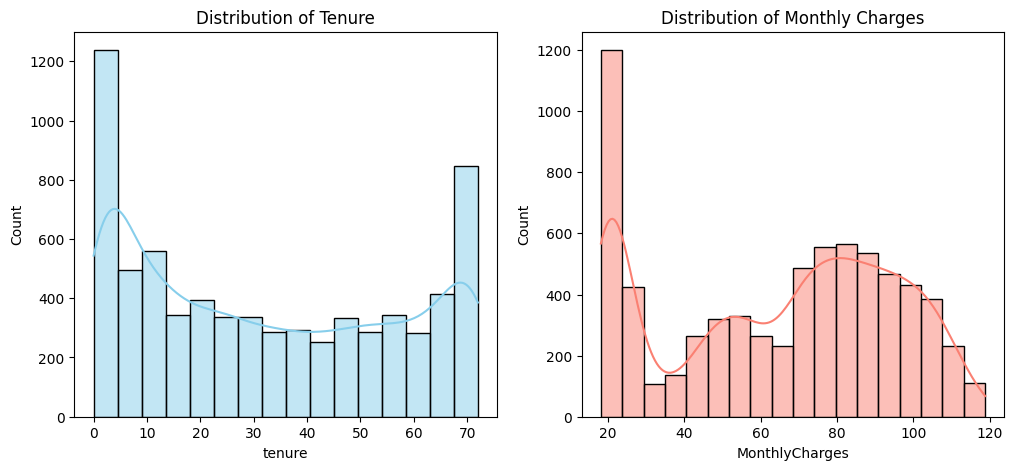

In [ ]:
# Summary Statistics and Histograms
# Generate summary statistics
print("Summary Statistics for Numerical Features:")
# We look at the original df for easier interpretation before scaling
display(df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe())

# Plot histograms
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['tenure'], kde=True, color='skyblue')
plt.title('Distribution of Tenure')

plt.subplot(1, 2, 2)
sns.histplot(df['MonthlyCharges'], kde=True, color='salmon')
plt.title('Distribution of Monthly Charges')

plt.show()

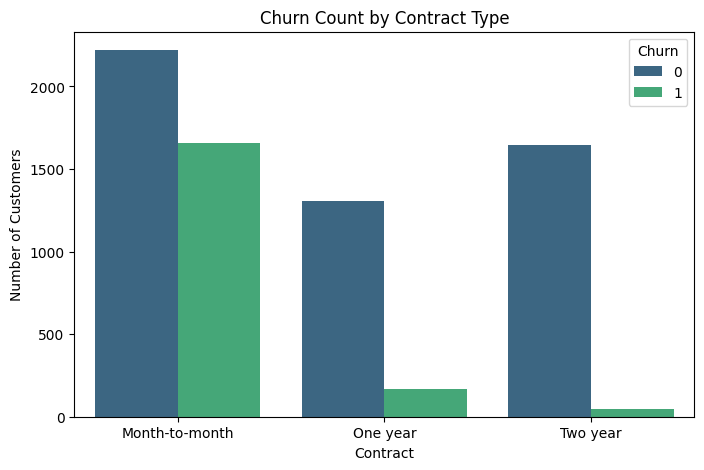

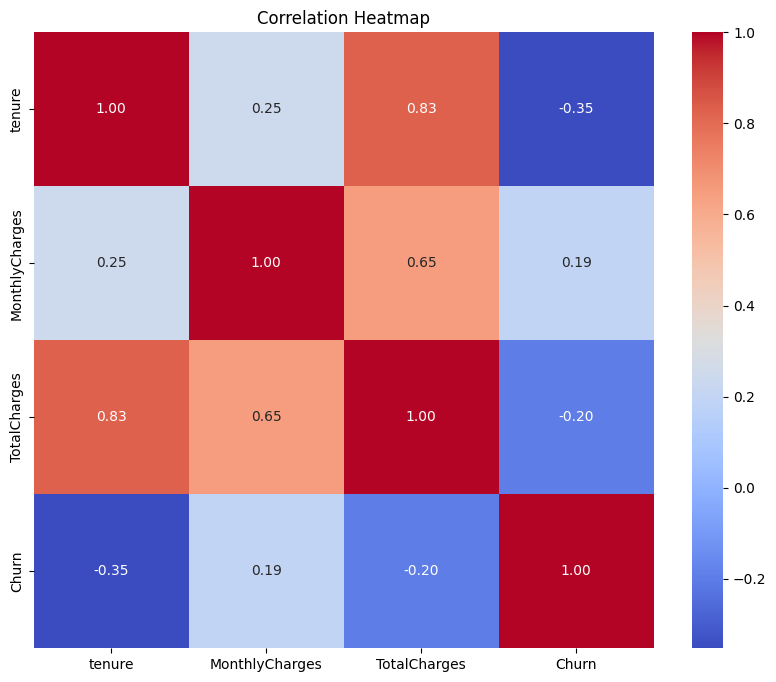

In [ ]:
# Bar Chart (Churn by Contract) and Heatmap
# Bar chart showing churn rate by contract type
plt.figure(figsize=(8, 5))
sns.countplot(x='Contract', hue='Churn', data=df, palette='viridis')
plt.title('Churn Count by Contract Type')
plt.ylabel('Number of Customers')
plt.show()

#  Correlation heatmap
plt.figure(figsize=(10, 8))
# Calculate correlation on the processed numeric data
corr = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Interpretation
# Briefly interpret major factors
print("""
Interpretation of EDA:
1. Contract Type: Customers with 'Month-to-month' contracts have a significantly higher churn rate compared to One or Two-year contracts.
2. Tenure: New customers (low tenure) are more likely to churn. As tenure increases, churn decreases.
3. Monthly Charges: Higher monthly charges appear to be associated with slightly higher churn.
4. Correlation: There is a negative correlation between Tenure and Churn (longer stay = less churn).
""")


Interpretation of EDA:
1. Contract Type: Customers with 'Month-to-month' contracts have a significantly higher churn rate compared to One or Two-year contracts.
2. Tenure: New customers (low tenure) are more likely to churn. As tenure increases, churn decreases.
3. Monthly Charges: Higher monthly charges appear to be associated with slightly higher churn.
4. Correlation: There is a negative correlation between Tenure and Churn (longer stay = less churn).



In [ ]:
# Training models
# Split data
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Train Models
#  Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

#  Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

print("Models Trained Successfully.")

Models Trained Successfully.


 Logistic Regression Evaluation 
Accuracy:  0.8211
Precision: 0.6862
Recall:    0.5979
F1-Score:  0.6390

Confusion Matrix:


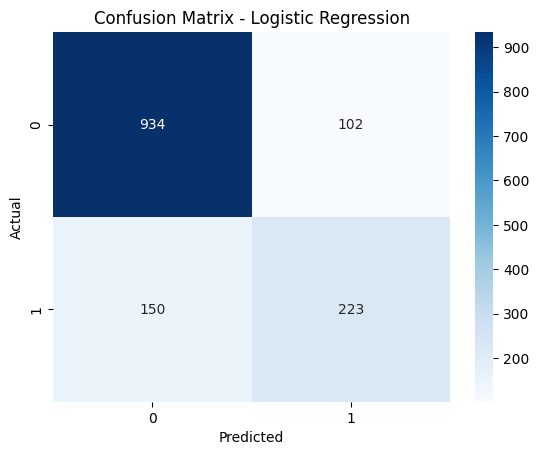

 Random Forest Evaluation 
Accuracy:  0.7864
Precision: 0.6406
Recall:    0.4397
F1-Score:  0.5215

Confusion Matrix:


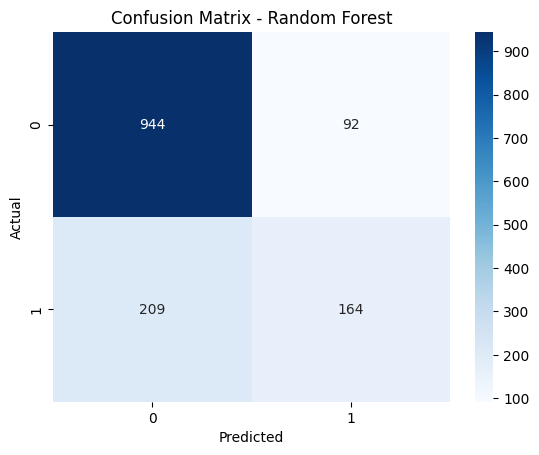

In [15]:
# Evaluate Models

def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f" {model_name} Evaluation ")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1-Score:  {f1:.4f}")
    
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()
    

evaluate_model(log_reg, X_test, y_test, "Logistic Regression")
evaluate_model(rf_clf, X_test, y_test, "Random Forest")

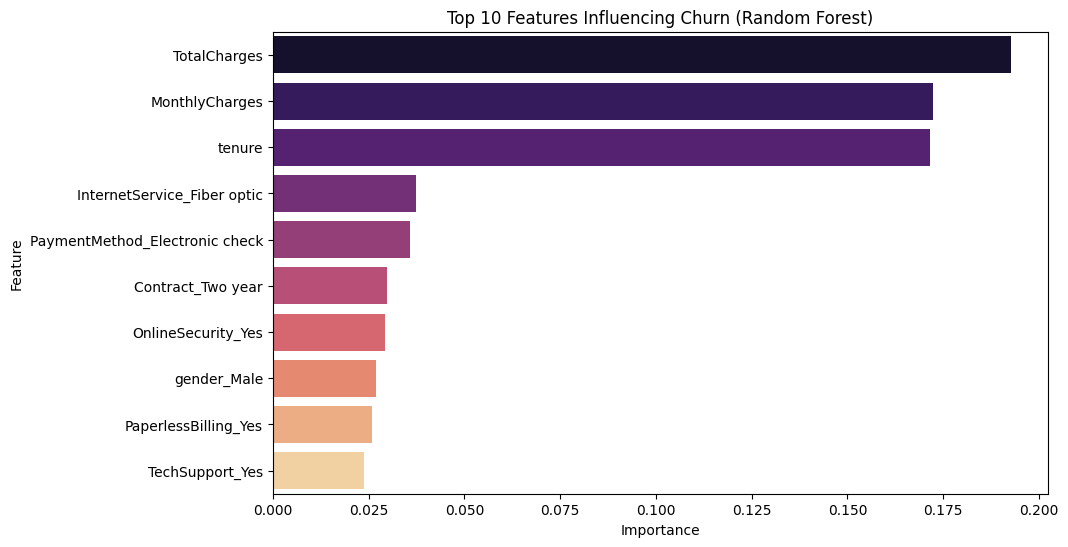

Top Factor Interpretation:
['TotalCharges' 'MonthlyCharges' 'tenure' 'InternetService_Fiber optic'
 'PaymentMethod_Electronic check' 'Contract_Two year' 'OnlineSecurity_Yes'
 'gender_Male' 'PaperlessBilling_Yes' 'TechSupport_Yes']

Interpretation: 'TotalCharges', 'MonthlyCharges', and 'tenure' are heavily weighted, indicating financial commitment and longevity are the strongest predictors. 'Fiber optic' internet service and 'Month-to-month' contracts are typically strong categorical predictors.


In [ ]:
# Feature Importance
# Identify and interpret most important features
importances = rf_clf.feature_importances_
feature_names = X.columns
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_imp_df = feature_imp_df.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='magma')
plt.title('Top 10 Features Influencing Churn (Random Forest)')
plt.show()

print("Top Factor Interpretation:")
print(feature_imp_df['Feature'].values)
print("\nInterpretation: 'TotalCharges', 'MonthlyCharges', and 'tenure' are heavily weighted, indicating financial commitment and longevity are the strongest predictors. 'Fiber optic' internet service and 'Month-to-month' contracts are typically strong categorical predictors.")

In [11]:
# Export Data for Power BI

df_powerbi = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df_powerbi['TotalCharges'] = pd.to_numeric(df_powerbi['TotalCharges'], errors='coerce').fillna(0)


all_predictions = rf_clf.predict(X)
all_probs = rf_clf.predict_proba(X)[:, 1] # Probability of Churn (Class 1)

df_powerbi['Predicted_Churn'] = all_predictions
df_powerbi['Churn_Probability'] = all_probs
df_powerbi['Risk_Level'] = pd.cut(df_powerbi['Churn_Probability'], 
                                  bins=[0, 0.3, 0.7, 1.0], 
                                  labels=['Low Risk', 'Medium Risk', 'High Risk'])

# Save to CSV
df_powerbi.to_csv('Telco_Churn.csv', index=False)
print("File 'Telco_Churn_PowerBI_Ready.csv' saved. Import this into Power BI.")

File 'Telco_Churn_PowerBI_Ready.csv' saved. Import this into Power BI.
